In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [50]:
data = {
    "I_diode_mA": [0, 33, 66, 100, 200, 300, 400, 500, 600], # mA
    "U_diode":    [1.447, 1.740, 1.770, 1.793, 1.845, 1.888, 1.925, 1.959, 1.992], # V
    "P_opt":      [0.55, 8.07, 17.31, 27.2, 54.9, 81.5, 106.6, 129.7, 151.1], # mW
}


df = pd.DataFrame(data)

df["I_diode_A"] = df["I_diode_mA"] / 1000
df["P_opt_W"]  = df["P_opt"] / 1000 

print(df)
# W = V*A


   I_diode_mA  U_diode   P_opt  I_diode_A  P_opt_W
0           0    1.447    0.55      0.000  0.00055
1          33    1.740    8.07      0.033  0.00807
2          66    1.770   17.31      0.066  0.01731
3         100    1.793   27.20      0.100  0.02720
4         200    1.845   54.90      0.200  0.05490
5         300    1.888   81.50      0.300  0.08150
6         400    1.925  106.60      0.400  0.10660
7         500    1.959  129.70      0.500  0.12970
8         600    1.992  151.10      0.600  0.15110


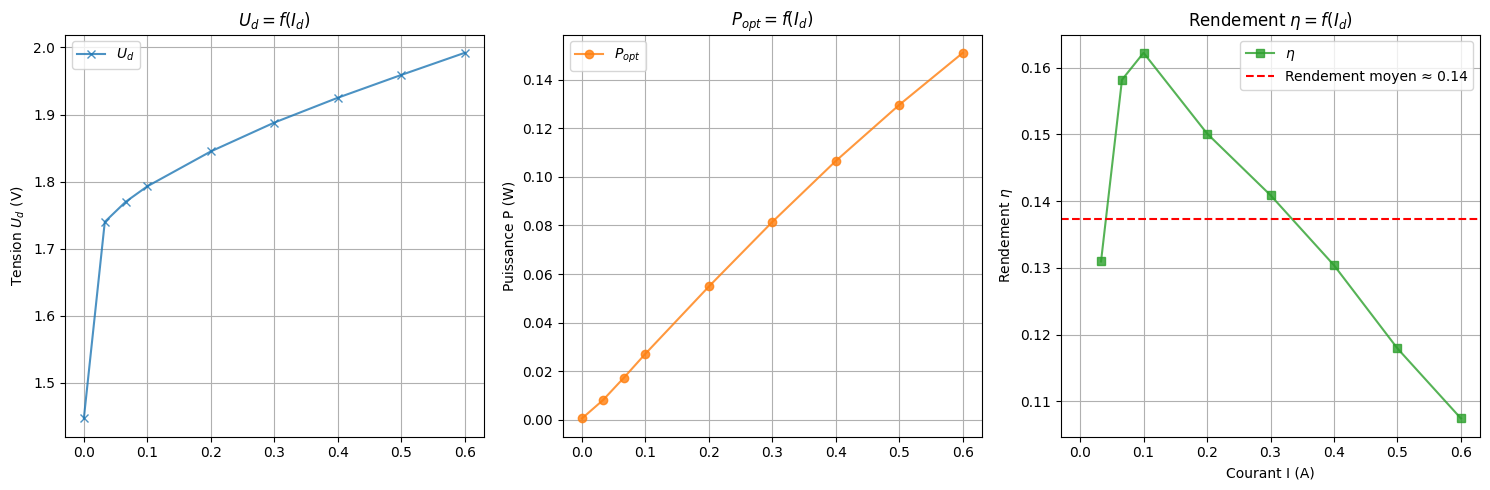

In [51]:
# Calcul du rendement η = ΔP / (ΔI * U)
df["eta"] = df["P_opt_W"].diff() / (df["I_diode_A"].diff() * df["U_diode"])
df.loc[0, "eta"] = np.nan  # Le premier point n'a pas de Δ

rendement_moyen = df["eta"].iloc[1:].mean()  # on ignore le premier NaN


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

ax1.set_title("$U_d = f(I_d)$")
ax1.plot(df["I_diode_A"], df["U_diode"], marker="x", color="tab:blue", alpha=0.8, label="$U_d$")
ax1.set_ylabel("Tension $U_d$ (V)")
ax1.grid(True)
ax1.legend()


ax2.set_title("$P_{opt} = f(I_d)$")
ax2.plot(df["I_diode_A"], df["P_opt_W"], marker="o", color="tab:orange", alpha=0.8, label="$P_{opt}$")
ax2.set_ylabel("Puissance P (W)")
ax2.grid(True)
ax2.legend()

# 3) Rendement η vs courant
ax3.set_title(r"Rendement $\eta = f(I_d)$")
ax3.plot(df["I_diode_A"], df["eta"], marker="s", color="tab:green", alpha=0.8, label=r"$\eta$")
ax3.axhline(rendement_moyen, color="red", linestyle="--", label=f"Rendement moyen ≈ {rendement_moyen:.2f}")
ax3.set_xlabel("Courant I (A)")
ax3.set_ylabel(r"Rendement $\eta$")
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()


**Rendement de la diode :**


$$\eta = \frac{P_\text{opt}}{I_d \cdot U_d}$$


ou en version différentielle pour les mesures :


$$\eta \approx \frac{\Delta P_\text{opt}}{\Delta I_d \cdot U_d}$$


In [60]:
f"La Led a un rendement de {rendement_moyen:.2f}"

'La Led a un rendement de 0.80'

In [61]:
# LASER

data_laser = {
    "I_diode_mA": [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4],   # mA
    "U_diode":    [1.647, 2.00, 2.07, 2.12, 2.18, 2.22, 2.3],  # V
    "P_opt_W":    [12.65e-9, 2.94e-6, 6.44e-6, 13.47e-6, 70.5e-6, 232.5e-6, 0.86e-3], # W
}

df = pd.DataFrame(data_laser)

df["I_diode_A"] = df["I_diode_mA"] / 1000

print(df)
    

   I_diode_mA  U_diode       P_opt_W  I_diode_A
0        0.00    1.647  1.265000e-08    0.00000
1        0.10    2.000  2.940000e-06    0.00010
2        0.15    2.070  6.440000e-06    0.00015
3        0.20    2.120  1.347000e-05    0.00020
4        0.25    2.180  7.050000e-05    0.00025
5        0.30    2.220  2.325000e-04    0.00030
6        0.40    2.300  8.600000e-04    0.00040


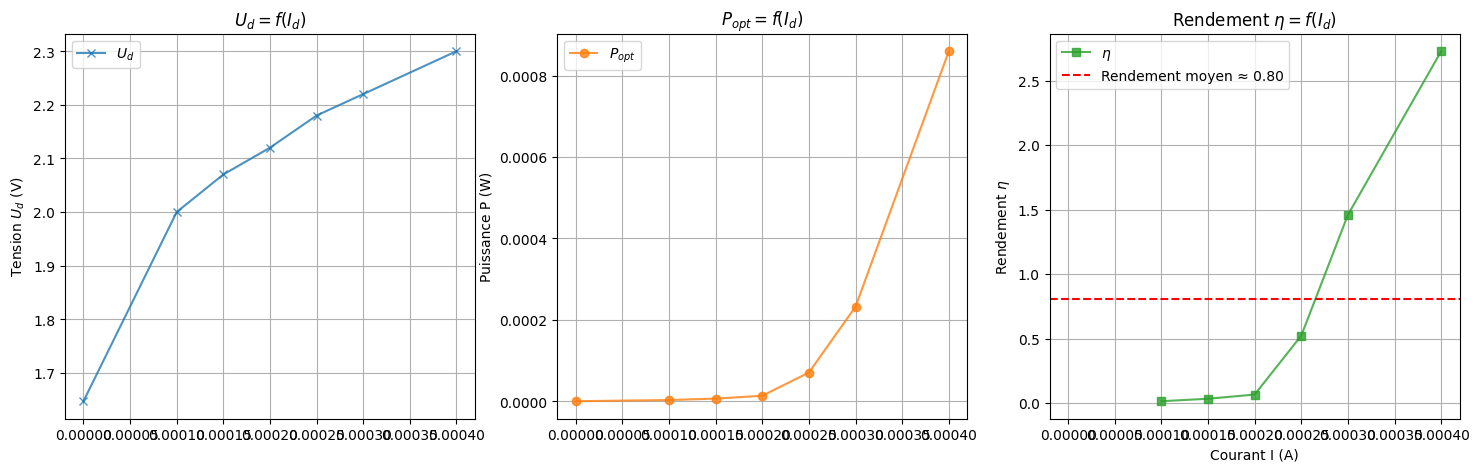

In [62]:
# Calcul du rendement η = ΔP / (ΔI * U)
df["eta"] = df["P_opt_W"].diff() / (df["I_diode_A"].diff() * df["U_diode"])
df.loc[0, "eta"] = np.nan  # Le premier point n'a pas de Δ

rendement_moyen = df["eta"].iloc[1:].mean()  # on ignore le premier NaN


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

ax1.set_title("$U_d = f(I_d)$")
ax1.plot(df["I_diode_A"], df["U_diode"], marker="x", color="tab:blue", alpha=0.8, label="$U_d$")
ax1.set_ylabel("Tension $U_d$ (V)")
ax1.grid(True)
ax1.legend()


ax2.set_title("$P_{opt} = f(I_d)$")
ax2.plot(df["I_diode_A"], df["P_opt_W"], marker="o", color="tab:orange", alpha=0.8, label="$P_{opt}$")
ax2.set_ylabel("Puissance P (W)")
ax2.grid(True)
ax2.legend()

# 3) Rendement η vs courant
ax3.set_title(r"Rendement $\eta = f(I_d)$")
ax3.plot(df["I_diode_A"], df["eta"], marker="s", color="tab:green", alpha=0.8, label=r"$\eta$")
ax3.axhline(rendement_moyen, color="red", linestyle="--", label=f"Rendement moyen ≈ {rendement_moyen:.2f}")
ax3.set_xlabel("Courant I (A)")
ax3.set_ylabel(r"Rendement $\eta$")
ax3.grid(True)
ax3.legend()

plt.show()

In [63]:
f"Le Laser a un rendement de {rendement_moyen:.2f}"

'Le Laser a un rendement de 0.80'

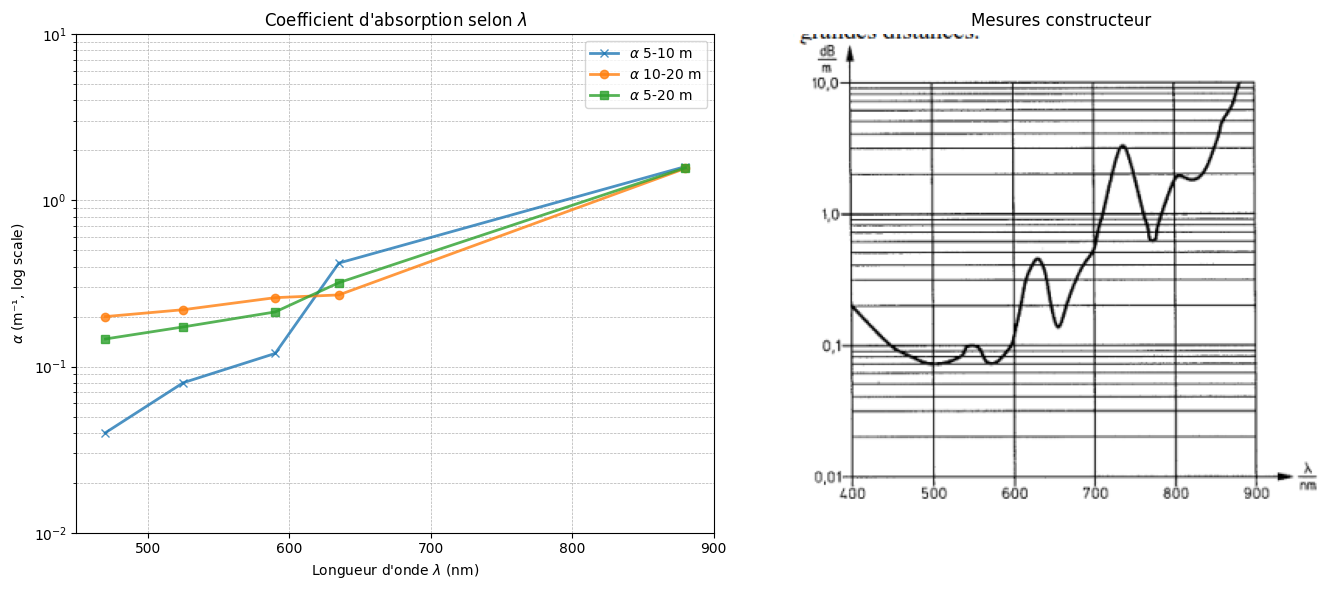

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg


data = {
    "lambda":   [470, 525, 590, 635, 880],  
    "dB5m":     [-6.9, -9.7, -25, -20.4, -23.0],  
    "dB10m":    [-7.1, -10.1, -25.6, -22.5, -31.0],
    "dB20m":    [-9.1, -12.3, -28.2, -25.2, -46.6],  
}

df = pd.DataFrame(data)
df["alpha_5_10"]  = np.abs(df["dB5m"]  - df["dB10m"]) / (10.0 - 5.0)
df["alpha_10_20"] = np.abs(df["dB10m"] - df["dB20m"]) / (20.0 - 10.0)
df["alpha_5_20"]  = np.abs(df["dB5m"]  - df["dB20m"]) / (20.0 - 5.0)


img = mpimg.imread("./fig_attenuation_constr.png")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


ax1.set_title(r"Coefficient d'absorption selon $\lambda$")
ax1.plot(df["lambda"], df["alpha_5_10"], marker="x", color="tab:blue", lw=2, alpha=0.8, label=r"$\alpha$ 5-10 m")
ax1.plot(df["lambda"], df["alpha_10_20"], marker="o", color="tab:orange", lw=2, alpha=0.8, label=r"$\alpha$ 10-20 m")
ax1.plot(df["lambda"], df["alpha_5_20"], marker="s", color="tab:green", lw=2, alpha=0.8, label=r"$\alpha$ 5-20 m")
ax1.set_yscale("log")
ax1.set_yticks([0.01, 0.1, 1.0, 10.0])
ax1.set_xlabel(r"Longueur d'onde $\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (m⁻¹, log scale)")
ax1.grid(True, which="both", ls="--", lw=0.5)
ax1.legend()

# img constructeur
ax2.imshow(img)
ax2.axis('off') 
ax2.set_title("Mesures constructeur")

plt.tight_layout()
plt.show()


**Coefficient d’absorption entre deux distances :**  

$$\alpha_{x-y} = \frac{| \text{dB}_x - \text{dB}_y |}{|y - x|} \quad \text{(en m⁻¹)}$$